<a href="https://colab.research.google.com/github/asantos20/S-ries-Temporais/blob/main/Projeto_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gerar código para analisar uma série temporal

In [31]:
#Pacotes
library(tidyverse)
library(lubridate)
library(ggplot2)
library(readxl)

In [32]:
options(scipen = 999) # tirar formato científico dos números

In [33]:
# Base de dados
preco <- read_excel('/content/Dados/preco.xlsx', sheet = 'Planilha1')

In [35]:
names(preco) # nome das colunas

[1] "Mês"   "Preco"

In [36]:
# Renomear a coluna - tirar acento para vacilitar
names(preco)[names(preco) == "Mês"] <- "Mes"

In [37]:
names(preco)

[1] "Mes"   "Preco"

In [41]:
dim(preco) # dimensões da tabela de dados

[1] 58  2

In [42]:
# Criação de coluna data no formato ANO-MES-DIA
preco <- preco %>%
  mutate(Data = ymd(Mes))

In [43]:
names(preco)

[1] "Mes"   "Preco" "Data"

In [52]:
head(preco); tail(preco)

Mes,Preco,Data
<dttm>,<dbl>,<date>
2020-01-01,237824.8,2020-01-01
2020-02-01,231415.5,2020-02-01
2020-03-01,294741.7,2020-03-01
2020-04-01,235586.1,2020-04-01
2020-05-01,184796.7,2020-05-01
2020-06-01,168344.3,2020-06-01


Mes,Preco,Data
<dttm>,<dbl>,<date>
2024-05-01,858548.2,2024-05-01
2024-06-01,842161.8,2024-06-01
2024-07-01,792046.8,2024-07-01
2024-08-01,870958.4,2024-08-01
2024-09-01,890782.9,2024-09-01
2024-10-01,898391.2,2024-10-01


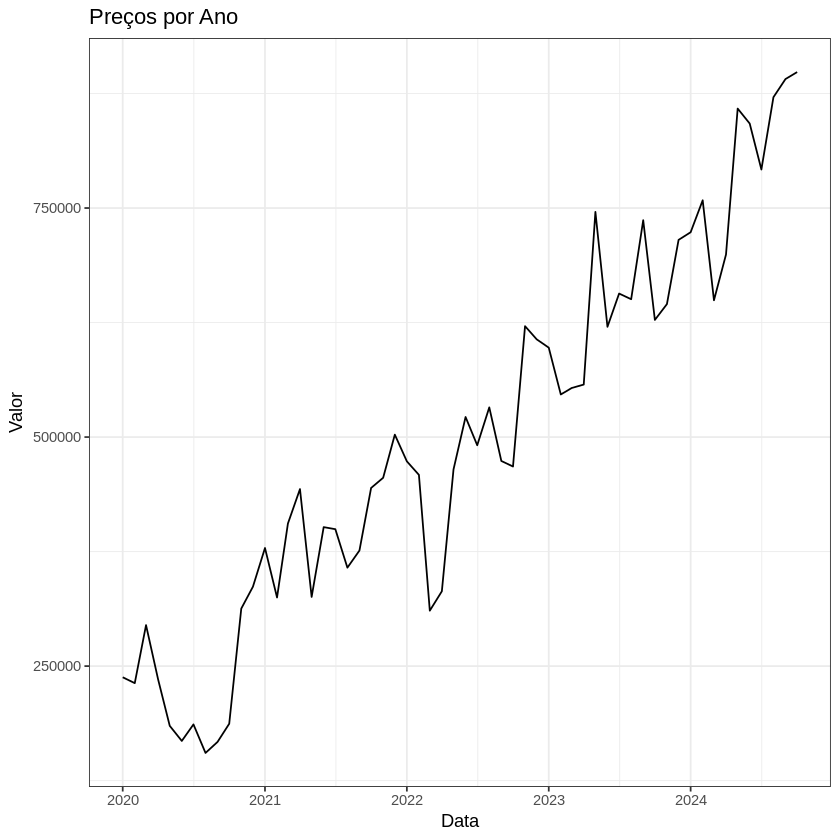

In [57]:
ggplot(preco, aes(x = Data, y = Preco)) +
  geom_line() +
  labs(title = "Preços por Ano",
       x = "Data",
       y = "Valor") +
  theme_bw()

In [46]:
# Decomposição da série temporal
ts_preco <- ts(preco$Preco, start = c(year(min(preco$Data)), month(min(preco$Data))), frequency = 12)
decomposicao <- decompose(ts_preco)

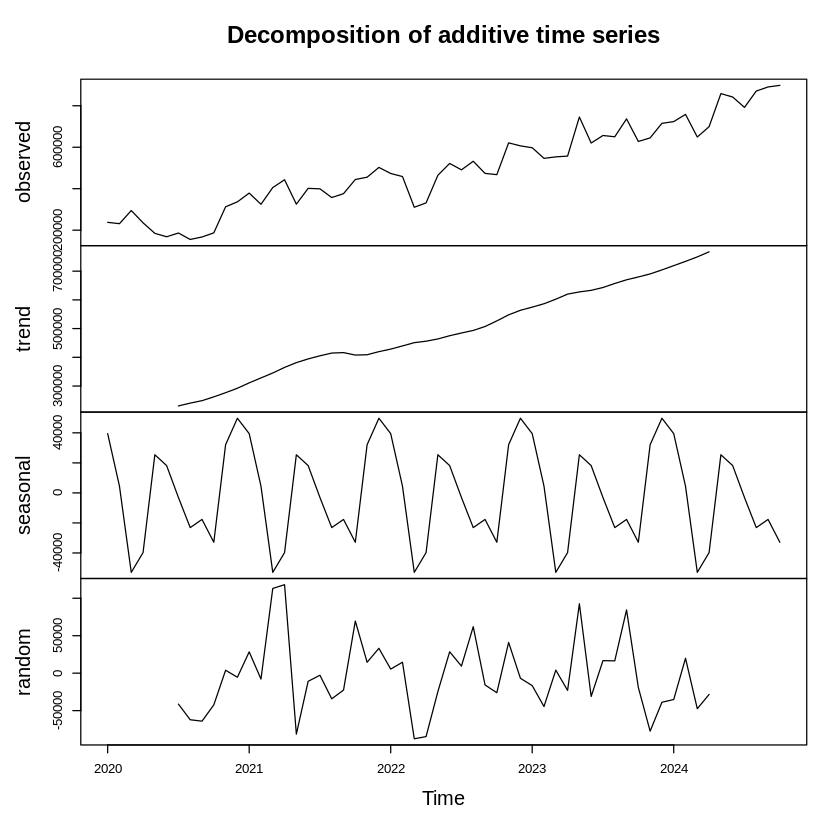

In [59]:
# Plotar componentes da série temporal
plot(decomposicao)

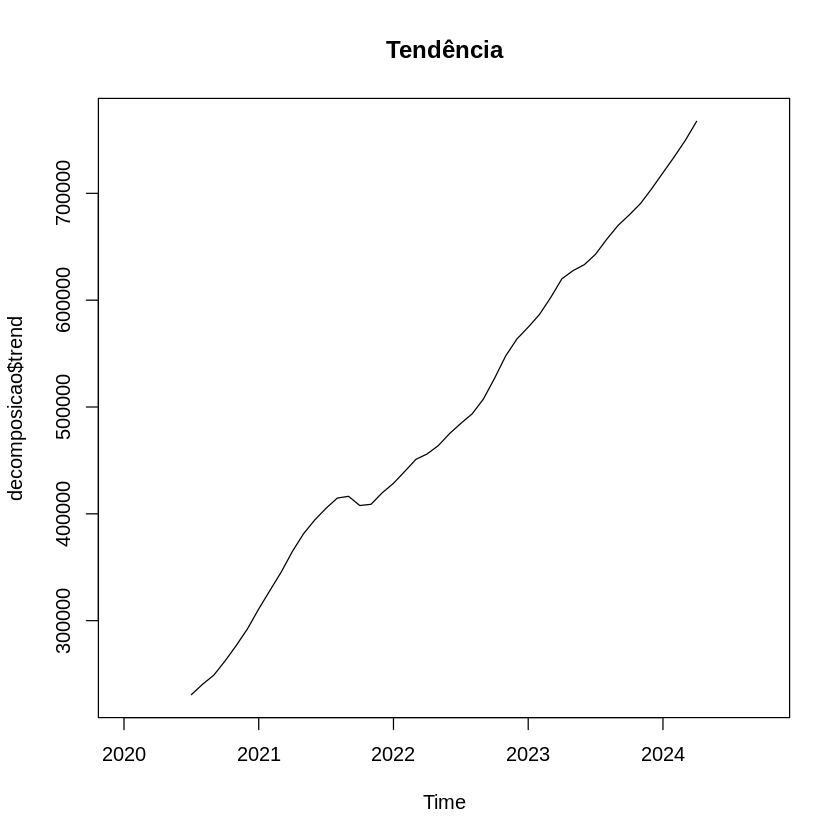

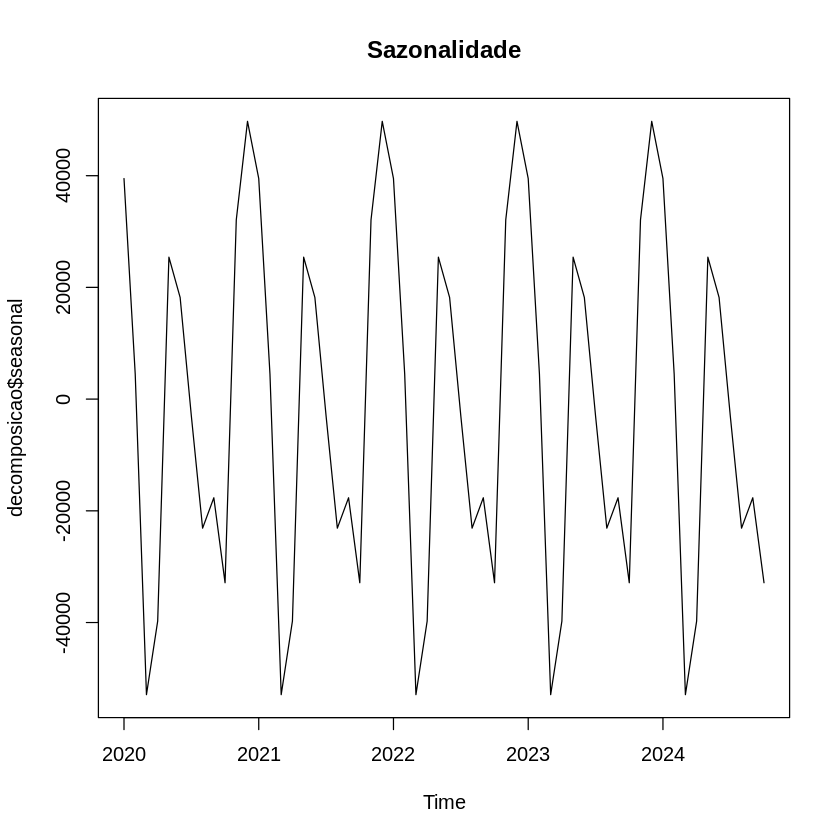

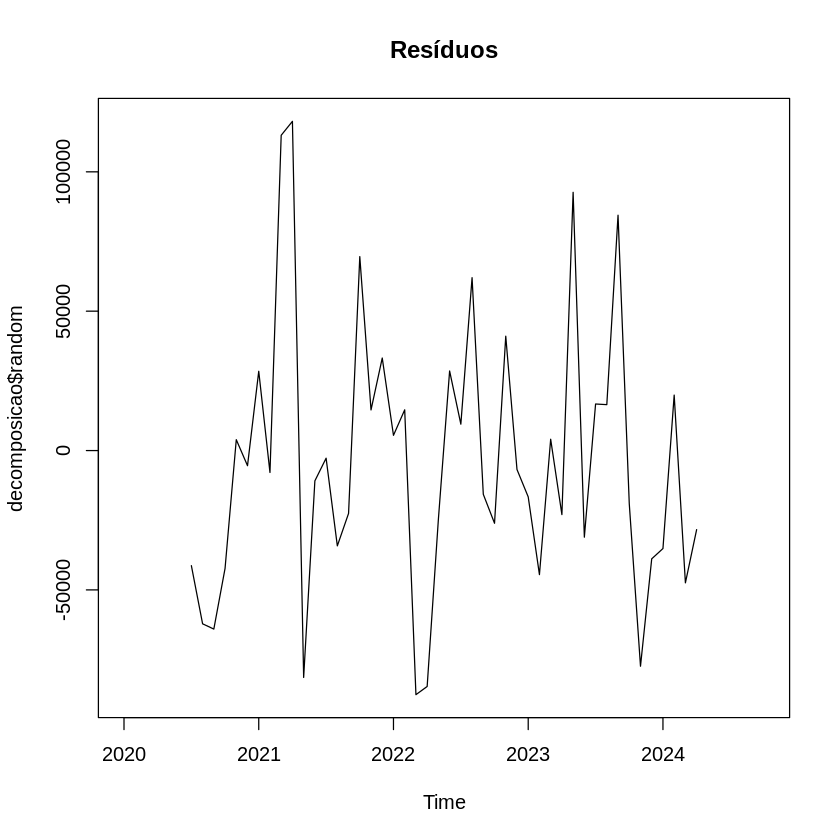

In [60]:
# Analisar tendência, sazonalidade e resíduos separadamente
plot(decomposicao$trend, main = "Tendência")
plot(decomposicao$seasonal, main = "Sazonalidade")
plot(decomposicao$random, main = "Resíduos")


In [ ]:
# Análise de autocorrelação (ACF) e autocorrelação parcial (PACF)
# Utilize as funções acf() e pacf() para isso

# Modelagem de séries temporais (ARIMA, etc.)
# Utilize as funções arima(), auto.arima() para isso

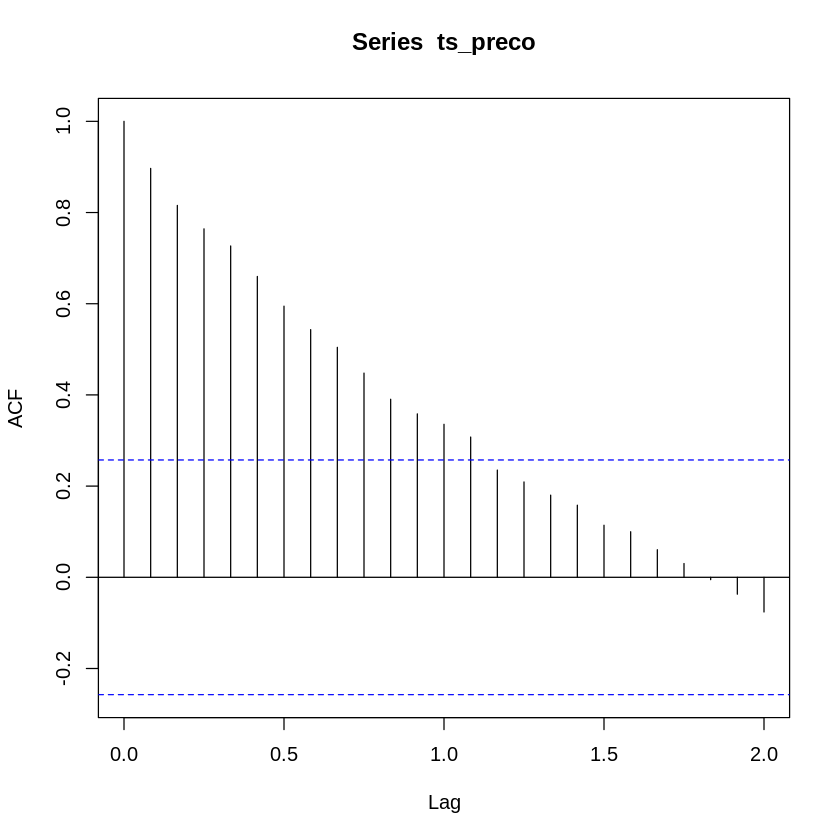

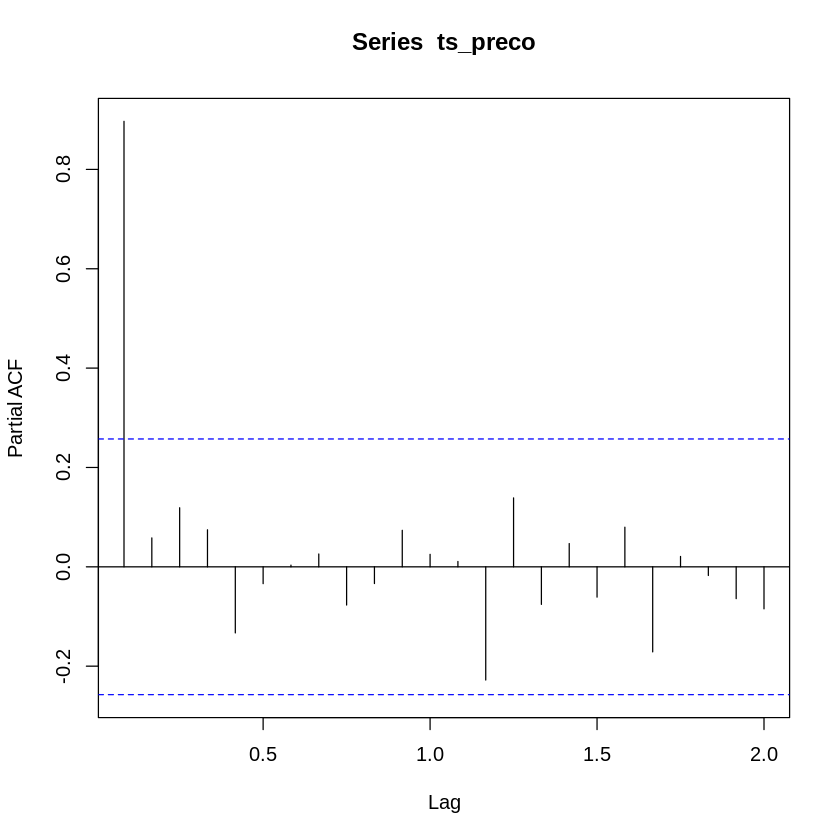

In [61]:
# prompt: Código para autocorrelação (ACF) e autocorrelação parcial (PACF)

# Autocorrelação (ACF)
acf(ts_preco, lag.max = 24)

# Autocorrelação Parcial (PACF)
pacf(ts_preco, lag.max = 24)

In [ ]:
# Função arima()
# Ajustar um modelo ARIMA com ordem (p, d, q) específica
modelo_arima <- arima(ts_preco, order = c(1, 1, 1)) # Exemplo: ARIMA(1,1,1)
summary(modelo_arima) # Resumo do modelo
# Previsões
previsoes_arima <- predict(modelo_arima, n.ahead = 12) # Previsão para os próximos 12 meses
# Plotar as previsões
plot(ts_preco, xlab="Tempo", ylab="Preço")
lines(previsoes_arima$pred, col="red")

# Função auto.arima()
# Encontrar a melhor ordem (p, d, q) automaticamente
library(forecast)
modelo_autoarima <- auto.arima(ts_preco)
summary(modelo_autoarima)
# Previsões
previsoes_autoarima <- forecast(modelo_autoarima, h = 12) # Previsão para os próximos 12 meses
# Plotar as previsões
plot(previsoes_autoarima)